In [2]:
import pandas as pd

df_incident_clean = pd.read_csv(
    "../data/LFB_incident_clean_2018.csv",
    parse_dates=["DateOfCall"]
)

print(df_incident_clean.info())
display(df_incident_clean.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822643 entries, 0 to 822642
Data columns (total 22 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   IncidentNumber                          822643 non-null  object        
 1   DateOfCall                              822643 non-null  datetime64[ns]
 2   CalYear                                 822643 non-null  int64         
 3   HourOfCall                              822643 non-null  int64         
 4   IncidentGroup                           822643 non-null  object        
 5   StopCodeDescription                     822643 non-null  object        
 6   PropertyCategory                        822643 non-null  object        
 7   PropertyType                            822643 non-null  object        
 8   Postcode_district                       822643 non-null  object        
 9   IncGeo_BoroughName                   

,IncidentNumber,DateOfCall,CalYear,HourOfCall,IncidentGroup,StopCodeDescription,PropertyCategory,PropertyType,Postcode_district,IncGeo_BoroughName,...,Northing_m,Latitude,Longitude,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,Diff_Second_vs_First
0,000009-01012018,2018-01-01,2018,0,False Alarm,AFA,Non Residential,Pub/wine bar/bar,BR3,BROMLEY,...,169565.0,51.408463,-0.025394,144.0,Beckenham,NaN,NaN,1.0,1.0,NaN
1,000010-01012018,2018-01-01,2018,0,Fire,Secondary Fire,Outdoor Structure,Common external bin storage area,N13,ENFIELD,...,193161.0,51.621823,-0.096022,232.0,Southgate,NaN,NaN,1.0,1.0,NaN
2,000011-01012018,2018-01-01,2018,0,Special Service,Special Service,Road Vehicle,Multiple Vehicles,EN1,ENFIELD,...,197474.0,51.659894,-0.052524,22.0,Enfield,NaN,NaN,1.0,1.0,NaN
3,000014-01012018,2018-01-01,2018,0,Fire,Primary Fire,Road Vehicle,Car,E15,NEWHAM,...,185362.0,51.549924,0.009877,241.0,Stratford,NaN,NaN,1.0,1.0,NaN
4,000025-01012018,2018-01-01,2018,0,False Alarm,False alarm - Good intent,Outdoor,Road surface/pavement,E1W,TOWER HAMLETS,...,180227.0,51.504883,-0.057584,250.0,Shadwell,NaN,NaN,1.0,1.0,NaN


In [10]:
import os
import matplotlib.pyplot as plt

# Création automatique du dossier ../figures
figures_dir = "../figures"
os.makedirs(figures_dir, exist_ok=True)

def savefig(name, dpi=300):
    """
    Sauvegarde le graphique courant dans le dossier ../figures
    name : str -> nom du fichier (ex: 'graphique1.png')
    dpi : résolution de l'image (par défaut 300 pour impression)
    """
    path = os.path.join(figures_dir, name)
    plt.savefig(path, dpi=dpi, bbox_inches="tight")
    print(f"✅ Figure sauvegardée : {path}")

In [3]:
# Gestion des NaN pour analyser les 2nd camions

# Dataset complet = toutes les interventions (1 ou 2 camions)
df_all = df_incident_clean.copy()

# Dataset comparatif = seulement celles avec 2 camions
df_two_pumps = df_incident_clean.dropna(
    subset=["SecondPumpArriving_AttendanceTime"]
).copy()

print("Taille du dataset complet :", len(df_all))
print("Taille du dataset comparatif (2 camions) :", len(df_two_pumps))

Taille du dataset complet : 822643
Taille du dataset comparatif (2 camions) : 320560


In [4]:
df_all["SecondPumpArriving_DeployedFromStation"] = (
    df_all["SecondPumpArriving_DeployedFromStation"].fillna("No Second Pump")
)

In [5]:
print(df_two_pumps[["FirstPumpArriving_AttendanceTime",
                    "SecondPumpArriving_AttendanceTime",
                    "Diff_Second_vs_First"]].describe())

       FirstPumpArriving_AttendanceTime  SecondPumpArriving_AttendanceTime  \
count                     320560.000000                      320560.000000   
mean                         298.993976                         395.326678   
std                          111.731019                         147.701544   
min                            1.000000                           1.000000   
25%                          226.000000                         300.000000   
50%                          285.000000                         372.000000   
75%                          355.000000                         463.000000   
max                         1199.000000                        1200.000000   

       Diff_Second_vs_First  
count         320560.000000  
mean              96.332702  
std              114.074315  
min            -1037.000000  
25%               17.000000  
50%               62.000000  
75%              144.000000  
max             1143.000000  


✅ Figure sauvegardée : ../figures/distribution_1er_vs_2e_camion.png


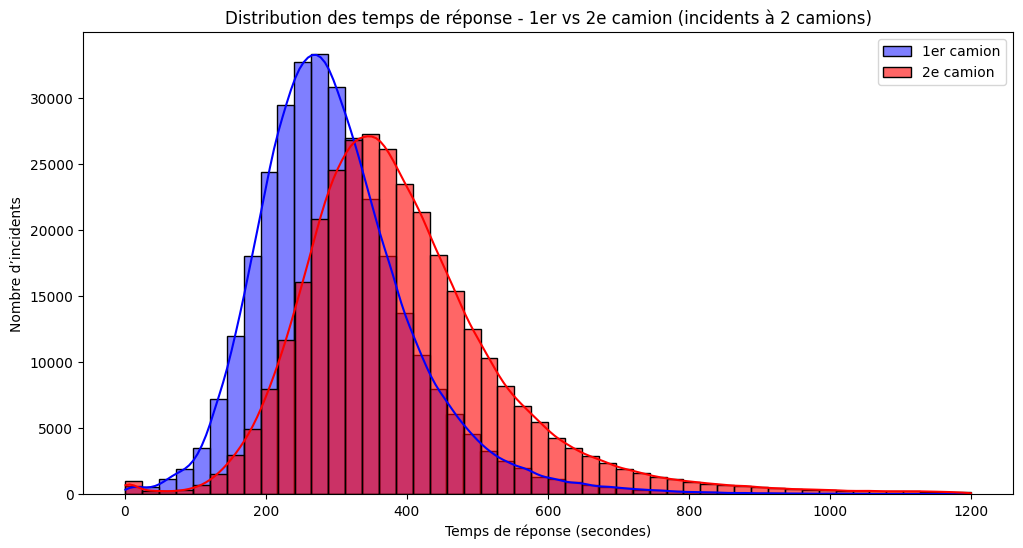

In [11]:
# Comparaison en cas de énd camion sur l'intervention
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.histplot(df_two_pumps["FirstPumpArriving_AttendanceTime"], 
             bins=50, color="blue", label="1er camion", kde=True)
sns.histplot(df_two_pumps["SecondPumpArriving_AttendanceTime"], 
             bins=50, color="red", label="2e camion", kde=True, alpha=0.6)

plt.legend()
plt.title("Distribution des temps de réponse - 1er vs 2e camion (incidents à 2 camions)")
plt.xlabel("Temps de réponse (secondes)")
plt.ylabel("Nombre d’incidents")

# Sauvegarde
savefig("distribution_1er_vs_2e_camion.png")

plt.show()

✅ Figure sauvegardée : ../figures/distribution_ecart_1er_vs_2e_camion.png


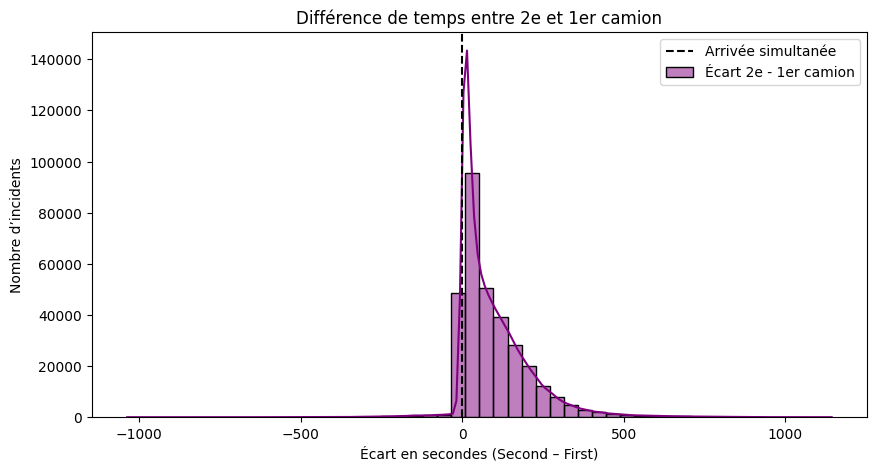

count    320560.000000
mean         96.332702
std         114.074315
min       -1037.000000
25%          17.000000
50%          62.000000
75%         144.000000
max        1143.000000
Name: Diff_Second_vs_First, dtype: float64


In [12]:
# Distribution de l'ecart entre les 2 camions

plt.figure(figsize=(10,5))
sns.histplot(df_incident_clean["Diff_Second_vs_First"].dropna(),
             bins=50, kde=True, color="purple", label="Écart 2e - 1er camion")

# Ligne verticale à 0
plt.axvline(0, color="black", linestyle="--", label="Arrivée simultanée")

# Titres et axes
plt.title("Différence de temps entre 2e et 1er camion")
plt.xlabel("Écart en secondes (Second – First)")
plt.ylabel("Nombre d’incidents")

# Ajout de la légende
plt.legend()

# Sauvegarde
savefig("distribution_ecart_1er_vs_2e_camion.png")

plt.show()

print(df_incident_clean["Diff_Second_vs_First"].describe())